In [26]:
#import all libraries for eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data_path = "/Users/chaitanyadua/Downloads/JustRAIGS_Train_labels.csv"

In [37]:
df = pd.read_csv(data_path, header=None, sep=';', low_memory=False)
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,Eye ID,Final Label,Fellow Eye ID,Age,Label G1,Label G2,Label G3,G1 ANRS,G1 ANRI,G1 RNFLDS,...,G3 ANRS,G3 ANRI,G3 RNFLDS,G3 RNFLDI,G3 BCLVS,G3 BCLVI,G3 NVT,G3 DH,G3 LD,G3 LC
1,TRAIN000000,NRG,TRAIN081848,48,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN000001,NRG,TRAIN018312,29,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN000002,NRG,TRAIN083822,61,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN000003,NRG,TRAIN055721,70,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101419,TRAIN101437,NRG,TRAIN096656,57,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101420,TRAIN101438,NRG,TRAIN078075,52,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101421,TRAIN101439,NRG,TRAIN056754,49,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101422,TRAIN101440,NRG,TRAIN040796,44,NRG,NRG,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


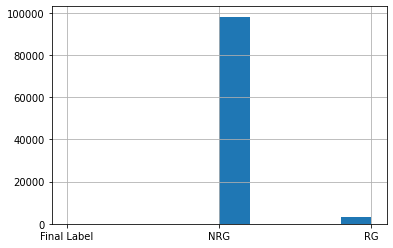

None

In [38]:
df[1].hist()
display(plt.show())

As we can see above, there is a big class imbalance above, hence our evaluation metric should also take that into account

In [31]:
# Assuming df is your DataFrame and 'column_name' is the column you want to convert
numeric = [3,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36]
df[numeric] = df[numeric].apply(pd.to_numeric, errors='coerce')
df.dtypes

0      object
1      object
2      object
3     float64
4      object
5      object
6      object
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
dtype: object

In [32]:
df_agreed = df[df[4] == df[5]].copy()
df_agreed

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
1,TRAIN000000,NRG,TRAIN081848,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN000001,NRG,TRAIN018312,29.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN000002,NRG,TRAIN083822,61.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TRAIN000003,NRG,TRAIN055721,70.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TRAIN000004,NRG,TRAIN099283,48.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101419,TRAIN101437,NRG,TRAIN096656,57.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101420,TRAIN101438,NRG,TRAIN078075,52.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101421,TRAIN101439,NRG,TRAIN056754,49.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101422,TRAIN101440,NRG,TRAIN040796,44.0,NRG,NRG,NaN,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_not_agreed = df[df[4] != df[5]].copy()
df_na_corr = df_not_agreed.corr(numeric_only=True)
df_not_agreed


,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,Eye ID,Final Label,Fellow Eye ID,NaN,Label G1,Label G2,Label G3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,TRAIN000011,NRG,TRAIN061398,50.0,RG,NRG,NRG,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,TRAIN000033,NRG,TRAIN070704,44.0,NRG,NaN,NRG,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,TRAIN000057,NRG,TRAIN018238,53.0,RG,NRG,NRG,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66,TRAIN000065,NRG,NaN,74.0,NRG,U,NRG,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101391,TRAIN101409,NRG,TRAIN069678,54.0,RG,U,NRG,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101398,TRAIN101416,NRG,TRAIN068490,68.0,NRG,RG,NRG,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101405,TRAIN101423,NRG,TRAIN071236,61.0,U,NRG,NRG,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101406,TRAIN101424,NRG,TRAIN035938,56.0,RG,NRG,NRG,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
corr= df.corr(numeric_only=True)
# print(corr)
print(df[1].corr(df[3]))

TypeError: unsupported operand type(s) for /: 'str' and 'int'

<Axes: >

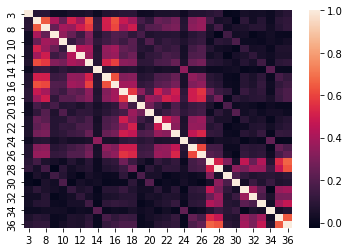

In [17]:
sns.heatmap(corr)

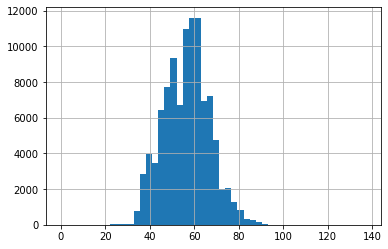

None

In [18]:
#plot the distribution of age with buckets 20-30, 30-40, 40-50, 50-60, 60-70, 70-80, 80-90
df[3].hist(bins=50)
display(plt.show())

In [22]:

shared_features = [7,8,9,10,11,12,13,14,15,16]
g1_g3_differences = df_not_agreed[[metric for metric in shared_features]]-(df_not_agreed[[metric+20 for metric in shared_features]].values)
g2_g3_differences = df_not_agreed[[metric+10 for metric in shared_features]]-(df_not_agreed[[metric+20 for metric in shared_features]].values)

for i in g1_g3_differences:
    i=np.absolute(i)

for i in g2_g3_differences:
    i=np.absolute(i)

g1_g3_avg_diff = g1_g3_differences.mean()
g2_g3_avg_diff = g2_g3_differences.mean()

print(g1_g3_avg_diff.mean())
print(g2_g3_avg_diff.mean())

0.06844499078057775
0.020804891922639363


**Inference**
We compare the outcomes of G1 and G2 with G3 to study which of the first two classifiers is closer to G3. When G1 and G2 are in agreement, however have different features, we take the features of the one closer to G3 ingeneral since it is given that G3 is a better classifier.

In [24]:
columns_agreed = [5,17,18,19,20,21,22,23,24,25]
columns_not_agreed = [6,27,28,29,30,31,32,33,34,35]

# df_agreed_g2 = df_agreed[[0,1,2,3] + columns_agreed]
df_agreed_g2 = df_agreed[[0,1,2,3]]
# df_not_agreed_g3 = df_not_agreed[[0,1,2,3] + columns_not_agreed]
df_not_agreed_g3 = df_not_agreed[[0,1,2,3]]
for i in range(1,len(columns_agreed)):
    df_agreed_g2[columns_agreed[i]]=df[columns_agreed[i]] & df[columns_agreed[i-10]]

df_not_agreed_g3 = df_not_agreed_g3.rename(columns={6:5, 26:16, 27:17, 28:18, 29:19, 30:20, 31:21, 32:22, 33:23, 34:24, 35:25, 36:26})

df_agreed_g2_g3 = df_agreed_g2.append(df_not_agreed_g3)
df_agreed_g2_g3

/var/folders/p_/fqmvngrd2pv82zqprj57m9w00000gn/T/ipykernel_59429/479106993.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_agreed_g2_g3 = df_agreed_g2.append(df_not_agreed_g3)


,0,1,2,3,5,16,17,18,19,20,21,22,23,24,25
1,TRAIN000000,NRG,TRAIN081848,48.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TRAIN000001,NRG,TRAIN018312,29.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TRAIN000002,NRG,TRAIN083822,61.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,TRAIN000003,NRG,TRAIN055721,70.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,TRAIN000004,NRG,TRAIN099283,48.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101391,TRAIN101409,NRG,TRAIN069678,54.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101398,TRAIN101416,NRG,TRAIN068490,68.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101405,TRAIN101423,NRG,TRAIN071236,61.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101406,TRAIN101424,NRG,TRAIN035938,56.0,NRG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
#put df_agreed_g2_g3 into a csv file
df_agreed_g2_g3.to_csv('C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project/JustRAIGS_Train_labels_agreed_g2_g3.csv', index=False, header=False)


OSError: Cannot save file into a non-existent directory: 'C:/Users/Shobhit/Desktop/IIITacad/Sem6/ML_project'

In [15]:
df_agreed_g2_g3.describe()

,3,16,17,18,19,20,21,22,23,24,25
count,101409.000000,100046.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000,101423.000000
mean,56.675098,0.016263,0.021908,0.023890,0.003264,0.004023,0.006626,0.007286,0.008213,0.001085,0.012177
std,10.200041,0.126484,0.146385,0.152707,0.057035,0.063298,0.081129,0.085049,0.090254,0.032915,0.109675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,137.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


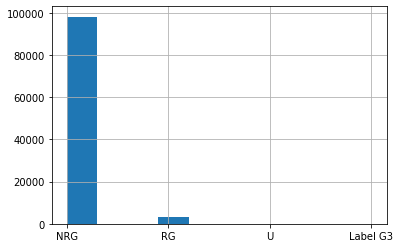

None

In [16]:
#check for class imbalance in df_agreed_g2_g3
df_agreed_g2_g3[5].hist()
display(plt.show())

In [192]:
#add count of all instances where column index 1 and column index 5 are not the same
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] != df_agreed_g2_g3.loc[i,5] and  df_agreed_g2_g3.loc[i,1] == "RG":
        ct += 1
print(ct)
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] != df_agreed_g2_g3.loc[i,5] and  df_agreed_g2_g3.loc[i,1] == "NRG":
        ct += 1
print(ct)
#count number of RGs in final label
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,1] == "RG":
        ct += 1
print(ct)
ct = 0
for i in range(len(df_agreed_g2_g3)):
    if df_agreed_g2_g3.loc[i,5] == "RG":
        ct += 1
print(ct)

86
190
3270
3184
